In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def determitate_label(column: str) -> str:
    """
    function used to determinate the label of the column, to avoid long names
    """
    if "zerofl" in column or "_ZERO" in column:
        return "ZeroFL"
        if "lda1000.0" in column:
            return "ZeroFL_lda1000.0"
        elif "lda1.0" in column:
            return "ZeroFL_lda1.0"
        elif "lda0.1" in column:
            return "ZeroFL_lda0.1"
    if "powerprop-a1.0-s0.9" in column or "_RESNET18-a1.0-s0.9" in column:
        return "Top-K"
        if "lda1000.0" in column:
            return "Resnet18_topk_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_topk_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_topk_lda0.1"
    if "powerprop-a1.0-s0.0" in column or "_RESNET18-a1.0-s0.0" in column:
        return "Dense"
        if "lda1000.0" in column:
            return "Resnet18_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_lda0.1"
    if "power_swat" in column or "_PPSWAT" in column:
        return "SparseFedPP"
        if "lda1000.0" in column:
            return "PowerSwat_lda1000.0"
        elif "lda1.0" in column:
            return "PowerSwat_lda1.0"
        elif "lda0.1" in column:
            return "PowerSwat_lda0.1"
    if "resnet" in column:
        return "Dense"
        if "lda1000.0" in column:
            return "Resnet18_lda1000.0"
        elif "lda1.0" in column:
            return "Resnet18_lda1.0"
        elif "lda0.1" in column:
            return "Resnet18_lda0.1"
    if "flash" in column:
        return "Flash"
        if "lda1000.0" in column:
            return "Flash_lda1000.0"
        elif "lda1.0" in column:
            return "Flash_lda1.0"
        elif "lda0.1" in column:
            return "Flash_lda0.1"

Data preparation


In [24]:
# Load the data from CSV files

# # SPEECH COMMANDS
# accuracy_data = pd.read_csv("SPEECH_sparsity_consumption_95_ACC.csv")
# sparsity_data = pd.read_csv("SPEECH_sparsity_consumption_95.csv")

# CIFAR100
# accuracy_data = pd.read_csv("CIFAR100_sparsity_consumption_95_acc.csv")
# sparsity_data = pd.read_csv("CIFAR100_sparsity_consumption_95.csv")

# CIFAR10
accuracy_data = pd.read_csv("data/CIFAR10_sparsity_consumption_95_acc5.csv")
sparsity_data = pd.read_csv("data/CIFAR10_sparsity_consumption_95_5.csv")


# accuracy_data = pd.read_csv('sparsity_consumption_90_acc3.csv')
# sparsity_data = pd.read_csv('sparsity_consumption_90_3.csv')

In [25]:
# LDA pratitioning to target
partitioning = "lda1000.0"

# Find common indices
common_indices = accuracy_data.index.intersection(sparsity_data.index)

# Filter dataframes to keep only common indices
accuracy_data = accuracy_data.loc[common_indices]
sparsity_data = sparsity_data.loc[common_indices]

# ACCURACY
# Remove columns containing "MIN" and "MAX" from accuracy_data
columns_to_drop = [
    col
    for col in accuracy_data.columns
    if "MIN" in col or "MAX" in col or partitioning not in col
]
accuracy_data = accuracy_data.drop(columns=columns_to_drop)
# rename the columns using determitate_label function
print(accuracy_data.columns)
accuracy_data.columns = [determitate_label(col) for col in accuracy_data.columns]

# SPARSITY
# Remove columns containing "MIN" and "MAX" from sparsity_data
columns_to_drop = [
    col
    for col in sparsity_data.columns
    if "MIN" in col or "MAX" in col or partitioning not in col
]
sparsity_data = sparsity_data.drop(columns=columns_to_drop)
# rename the columns using determitate_label function
sparsity_data.columns = [determitate_label(col) for col in sparsity_data.columns]
sparsity_data = (100 - sparsity_data + 5) / 100 * 11000000

# sparsity_data["Resnet18_lda1000.0"] = 2 * 11000000

# Compute cumulative communication cost for each column
communication_cost_data = sparsity_data.cumsum()


# Check if both data frames have the same index/labels
print(sparsity_data.columns)
# if not accuracy_data.columns.equals(sparsity_data.columns):
#     raise ValueError("The labels in accuracy.csv and sparsity.csv do not match.")


# Extract the labels
labels = accuracy_data.columns

Index(['flash-a1.0-s0.95-cifar10_lda1000.0-FedAvgFLASH-e1-lr0.5 - test_accuracy',
       'power_swat-a1.25-s0.95-cifar10_lda1000.0-FedAvg-e1-lr0.5 - test_accuracy',
       'powerprop-a1.0-s0.95-cifar_lda1000.0-FedAvg-e1-lr0.5 - test_accuracy',
       'zerofl-a1.0-s0.95-cifar_lda1000.0-FedAvgNZ-e1-lr0.5 - test_accuracy',
       'resnet18-cifar_lda1000.0-FedAvg-e1-lr0.5 - test_accuracy'],
      dtype='object')
Index(['Flash', 'SparseFedPP', 'Top-K', 'ZeroFL', 'Dense'], dtype='object')


In [26]:
def moving_average(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()


# Window size for moving average
window_size = 50

In [27]:
# # Iterate through each model column and plot accuracy vs communication cost
# for column in accuracy_data.columns:
#     smoothed_accuracy = moving_average(accuracy_data[column], window_size)
#     smoothed_communication_cost = moving_average(
#         communication_cost_data[column], window_size
#     )

#     plt.figure(figsize=(10, 6))
#     plt.plot(smoothed_communication_cost, smoothed_accuracy, marker="o", label=column)
#     plt.xlabel("Communication Cost")
#     plt.ylabel("Accuracy")
#     plt.title(f"Accuracy vs Communication Cost for {column}")
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

Linear plot


In [28]:
# plt.figure(figsize=(10, 6))
# for column in accuracy_data.columns:
#     smoothed_accuracy = moving_average(accuracy_data[column], window_size)
#     smoothed_communication_cost = moving_average(
#         communication_cost_data[column], window_size
#     )

#     plt.plot(smoothed_communication_cost, smoothed_accuracy, label=column)
# plt.xlabel("Communication Cost")
# # plt.xscale('log')
# plt.ylabel("Accuracy")
# plt.title("Accuracy vs Communication Cost for All Models")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

Logaritmic plot


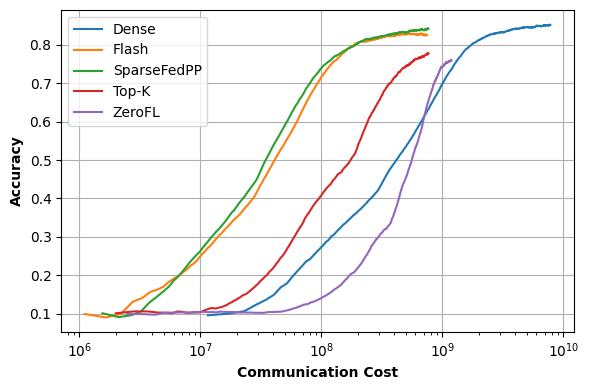

In [29]:
# Sort the columns based on the name
accuracy_data = accuracy_data.reindex(sorted(accuracy_data.columns), axis=1)

plt.figure(figsize=(6, 4))
for column in accuracy_data.columns:
    smoothed_accuracy = moving_average(accuracy_data[column], window_size)
    smoothed_communication_cost = moving_average(
        communication_cost_data[column], window_size
    )

    plt.plot(smoothed_communication_cost, smoothed_accuracy, label=column)
plt.xlabel("Communication Cost", fontweight="bold")
plt.xscale("log")
plt.ylabel("Accuracy", fontweight="bold")
# plt.title("Accuracy vs Communication Cost for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()